In [1]:
#Fourier cosine expansion

In [105]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


In [106]:
# Share specific info
r = 0.06
S0 = 100
sigma = 0.3

# Call option info
K = 110
T = 1
kLog = np.log(K)
phi = norm.cdf
t = 0

In [117]:
def analytical_price(S0,K,r,sigma,T):
    d1 = (np.log(S0/K) + (r + sigma**2/2) * (T-t)) / sigma * np.sqrt(T-t)
    d2 = d1 - sigma * np.sqrt(T-t)
    return S0 * phi(d1) - K * np.exp(-r * T) * phi(d2)
analytical_price = analytical_price(S0,K,r,sigma,T)

In [118]:
# Characteristic funciton of a normal random variable
def CF(t, mu=0, s=1):
    return np.exp(1j*t*mu - (t**2)*(s**2) / 2)

In [119]:
# Check notes for formulas
def upsilon_n(c, d, n, b1, b2):
    npi = n*np.pi/(b2-b1)
    npi_c = npi * (c - b1)
    npi_d = npi * (d - b1)
    
    numerator = np.cos(npi_d)*np.exp(d) - np.cos(npi_c)*np.exp(c) + npi * (np.sin(npi_d) * np.exp(d) - np.sin(npi_c) * np.exp(c))
    return numerator / (1+ npi**2)

def psi_n(c, d, n, b1, b2):
    if n==0:
        return d-c
    else:
        return (b2 - b1)/(n*np.pi) * (np.sin(n*np.pi*(d - b1)/(b2 - b1)) - np.sin(n*np.pi*(c - b1)/(b2 - b1)))

In [124]:
# Call Valuation
# Vn = 2*K*(Upsilon(0,b2) - psi_n(0,b2)) / b2-b1

def v_n(n, K, b1, b2):
    return 2/(b2 - b1) * K * (upsilon_n(0, b2, n, b1, b2) - psi_n(0, b2, n, b1, b2))

def fourier_cos_call_price(r, sigma, S0, K, T, N, b1, b2):
    mu = np.log(S0/K) + (r - sigma**2/2)*T
    s = sigma*np.sqrt(T)
    npi = lambda n: n*np.pi/(b2 - b1)
    v = lambda n: v_n(n, K, b1, b2)
    first_term = v(0)*CF(0, mu=mu, s=s)/2
    second_term = np.sum([(CF(npi(n), mu=mu, s=s) * np.exp(-1j*b1*npi(n))).real * v(n) for n in range(1, N)])
    return np.exp(-r*T)*(first_term + second_term).real

In [127]:
# b1, b2 for call
c1 = r
c2 = T * sigma**2
c4 = 0
L = 10

b1 = c1 - L * np.sqrt(c2 + np.sqrt(c4))
b2 = c1 + L * np.sqrt(c2 + np.sqrt(c4))


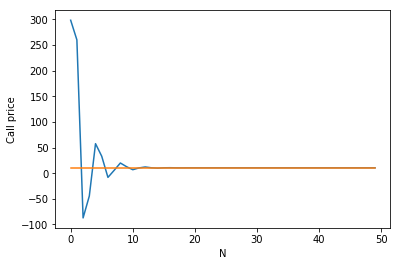

In [129]:
fourier_cos_prices = [fourier_cos_call_price(r, sigma, S0, K, T, n, b1, b2) for n in range (1, 51)]
plt.plot(fourier_cos_prices)
plt.plot([analytical_price] * 50)
plt.xlabel('N')
plt.ylabel('Call price')
plt.plot()
plt.show()

In [132]:
print("Call Option Analytical Price : {}".format(analytical_price))
print("Fourier COS price : {}".format(fourier_cos_prices[-1]))

Call Option Analytical Price : 10.424100458714285
Fourier COS price : 10.4241004587141
